In [63]:
import numpy as np 
from scipy import stats
import plotly.express as px
import pandas as pd

# 1. Тесты нормальности
## Shapiro–Wilk test

Интерпретация
- H0: образец имеет гауссово распределение.
- H1: образец не имеет гауссовского распределения.


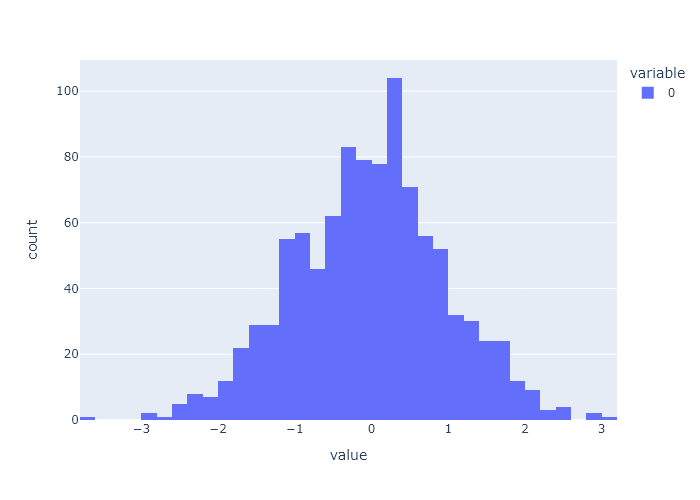

In [64]:
# Генерируем выборку данных из 1000 точек с нормальным распределением
rng = np.random.default_rng(seed=42)
X = stats.norm.rvs(loc=0, scale=1, size=1000, random_state=rng)

# Проверяем визуально, похож ли результат на нормальное распределение? (должно быть похоже)
fig = px.histogram(X)
fig.show('png')

In [65]:
# Проверяем данные на нормальность по критерию Шапиро
statistic, pvalue = stats.shapiro(X)

print(f"{statistic=}, {pvalue=}")

if pvalue < 0.05:
    print('pvalue < 0.05, отвергаем нулевую гипотезу о нормальности данных')
else:
    print('pvalue > 0.05, не можем отвергнуть нулевую гипотезу о нормальности данных')

statistic=0.9988041585898126, pvalue=0.7575916475971813
pvalue > 0.05, не можем отвергнуть нулевую гипотезу о нормальности данных


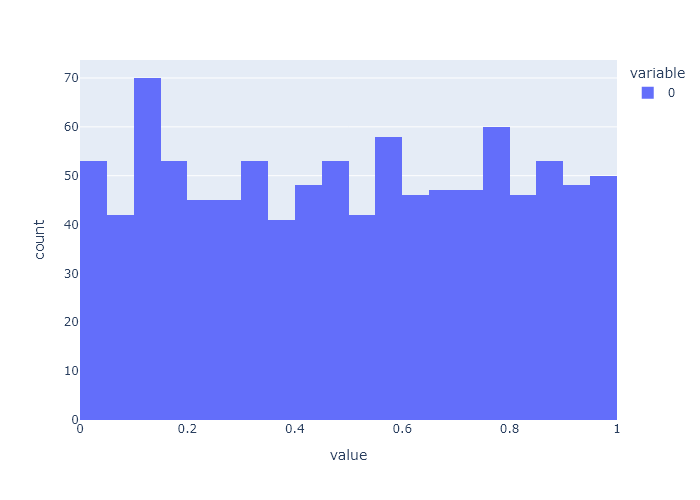

In [66]:
# Генерируем равномерное распределение
rng = np.random.default_rng(seed=42)
X = stats.uniform.rvs(size=1000, random_state=rng)

# Проверяем визуально, похоже ли на нормальное распределение (нет)
fig = px.histogram(X)
fig.show('png')

In [67]:
# Проверяем по критерию Шапиро
statistic, pvalue = stats.shapiro(X)

print(f"{statistic=}, {pvalue=}")

if pvalue < 0.05:
    print('pvalue < 0.05, отвергаем нулевую гипотезу о нормальности данных')
else:
    print('pvalue > 0.05, не можем отвергнуть нулевую гипотезу о нормальности данных')

statistic=0.9507378249208503, pvalue=8.733827414048022e-18
pvalue < 0.05, отвергаем нулевую гипотезу о нормальности данных


### Стастическая значимость
Посмотрим, в скольки случаях из 1000 мы отвергнем гипотезу (когда она верна)

In [68]:
rng = np.random.default_rng(seed=42)

results = []
for _ in range(1000):
    x = stats.norm.rvs(loc=5, scale=3, size=1000, random_state=rng)
    shapiro_test = stats.shapiro(x)
    results.append(shapiro_test.pvalue)

# Проверяем, в скольки случаях     
sum(list(map(lambda x: x > 0.05, results)))/len(results)

0.948

# Практический пример

## Скачиваем данные 

In [69]:
# Скачиваем данные в папку с ноутбуком
!curl -O https://raw.githubusercontent.com/harika-bonthu/Hypothesis-test-examples/main/pizzas.csv
# Создаем датафрейм с данными
data = pd.read_csv('pizzas.csv')
# Выводим верхнюю часть таблицы с данными
data.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   539  100   539    0     0   1887      0 --:--:-- --:--:-- --:--:--  1897


,Making Unit 1,Making Unit 2
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


## Выдвигаем гипотезу

Данные в таблице - диаметры пицц в двух пиццериях - пиццерии 1 и пиццерии 2.

In [70]:
# Мы хотим проверить данные на нормальность, давайте сформулируем нулевую и альтернативную гипотезы
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
# Выбираем уровень значимости
alpha = 0.05

## Проверяем гипотезу о нормальности данных

In [71]:
_, p = stats.shapiro(data['Making Unit 2'])
print('p=%.3f' % p)

# Интерпретация 
if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.523
Данные распределены нормально


## Проверяем гипотезу о равенстве средних

In [72]:
# Проведем Т-тест для сравнения диаметров пицц в двух пиццериях
from scipy.stats import ttest_ind

H0 = 'Нет значимой разницы между диаметрами пиццы в разных пиццериях.'
Ha = 'Есть значимая разница между диаметрами пиццы в разных пиццериях.'

test_results = ttest_ind(data['Making Unit 1'], data['Making Unit 2'], equal_var=True)

p = round(test_results.pvalue, 2)

if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.47 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы между диаметрами пиццы в разных пиццериях.


# 2. Корреляционные тесты
## Коэффициент корреляции Пирсона
Проверяет, имеют ли два образца линейную зависимость.

Предположения
- Наблюдения в каждой выборке независимы и одинаково распределены (iid).
- Наблюдения в каждой выборке обычно распределяются.
- Наблюдения в каждом образце имеют одинаковую дисперсию.

Интерпретация
- H0: два образца независимы (означает (!)равенство условных вероятностей)
- H1: существует зависимость между образцами.

In [73]:
from scipy import stats
res = stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])
res

PearsonRResult(statistic=-0.7426106572325057, pvalue=0.15055580885344538)

### Alternatives (‘two-sided’, ‘greater’, ‘less’)

In [74]:
res = stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])
res_greater = stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4], alternative='greater')
res_less = stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4], alternative='less')
res, res_greater, res_less

(PearsonRResult(statistic=-0.7426106572325057, pvalue=0.15055580885344538),
 PearsonRResult(statistic=-0.7426106572325057, pvalue=0.9247220955732772),
 PearsonRResult(statistic=-0.7426106572325057, pvalue=0.07527790442672269))

In [75]:
rng = np.random.default_rng()
s = 0.5
x = stats.norm.rvs(size=500, random_state=rng)
e = stats.norm.rvs(scale=s, size=500, random_state=rng)
y = x + e

In [76]:
px.scatter(x=x,y=y)

In [77]:
stats.pearsonr(x, y)
# Малое значение p-value -> отвергаем нулевую гипотезу

PearsonRResult(statistic=0.8811389637301065, pvalue=4.201947314329681e-164)

In [78]:
# H0 - переменные независимы
# ‘two-sided’: the correlation is nonzero
# ‘less’: the correlation is negative (less than zero)
# ‘greater’: the correlation is positive (greater than zero)

res = stats.pearsonr(x,y)
res_greater = stats.pearsonr(x,y, alternative='greater')
res_less = stats.pearsonr(x,y, alternative='less') #Тут мы приняли нулевую гипотезу!
res, res_less, res_greater

(PearsonRResult(statistic=0.8811389637301065, pvalue=4.201947314329681e-164),
 PearsonRResult(statistic=0.8811389637301065, pvalue=1.0),
 PearsonRResult(statistic=0.8811389637301065, pvalue=2.1009736571648406e-164))

In [79]:
stats.pearsonr(x, e)
# Малое значение p-value -> принимаем нулевую гипотезу

PearsonRResult(statistic=-0.0277036573301151, pvalue=0.5365484602087695)

In [80]:
px.scatter(x=x,y=e)

# 3. Параметрические статистические проверки гипотез
## T-тест

Предположения
- Наблюдения в каждой выборке независимы и одинаково распределены
- Наблюдения в каждой выборке распределены нормально
- Наблюдения в каждом образце имеют одинаковую дисперсию

Интерпретация
- H0: матожидания образцов равны.
- H1: матожидания образцов неравны.

In [81]:
from scipy import stats
rng = np.random.default_rng()
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

In [82]:
# Нарисуем гистограммы двух величин
import numpy as np
import pandas as pd
import plotly.express as px

df = pd.DataFrame(dict(
    series=np.concatenate((["a"]*len(rvs1), ["b"]*len(rvs2))), 
    data  =np.concatenate((rvs1,rvs2))
))

px.histogram(df, x="data", color="series", barmode="overlay")

In [83]:
# Проанализируем p-value теста
stats.ttest_ind(rvs1, rvs2)

TtestResult(statistic=0.4619081010316347, pvalue=0.6442478940950254, df=998.0)

In [84]:
rvs1 = stats.norm.rvs(loc=5, scale=1, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=6, scale=1, size=500, random_state=rng)

# Нарисуем гистограммы двух величин

df = pd.DataFrame(dict(
    series = np.concatenate((["a"]*len(rvs1), ["b"]*len(rvs2))), 
    data  = np.concatenate((rvs1,rvs2))
))

px.histogram(df, x="data", color="series", barmode="overlay")

In [85]:
stats.ttest_ind(rvs1, rvs2, alternative='two-sided')
# Принимаем решение что выборки не равны (отвергаем гипотезу 0)

TtestResult(statistic=-15.378390113033849, pvalue=4.7018459781501794e-48, df=998.0)

In [86]:
# Истина - первое меньше второго 

# Альтернатива = первое меньше второго 
stats.ttest_ind(rvs1, rvs2, alternative='less')

# Принимаем решение что выборки не равны (отвергаем гипотезу 0)

TtestResult(statistic=-15.378390113033849, pvalue=2.3509229890750897e-48, df=998.0)

In [87]:
# Альтернатива = второе меньше первого 
stats.ttest_ind(rvs1, rvs2, alternative='greater')

# Принимаем решение что выборки равны !!! (принимаем гипотезу 0)

TtestResult(statistic=-15.378390113033849, pvalue=1.0, df=998.0)

# 4. Непараметрические статистические проверки гипотез
## U-тест Манна-Уитни
Проверяет, равны ли распределения двух независимых выборок или нет (чаще всего проверка относительно сдвига)

Предположения
- Наблюдения в каждой выборке независимы
- Наблюдения в каждом образце могут быть ранжированы.

Интерпретация
- H0: распределения обоих образцов равны.
- H1: распределения обоих образцов не равны.

In [88]:
males = [19, 22, 16, 29, 24]
females = [20, 11, 17, 12]

In [89]:
from scipy.stats import mannwhitneyu
mannwhitneyu(males, females, method="exact")

MannwhitneyuResult(statistic=17.0, pvalue=0.1111111111111111)

In [90]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

df = pd.DataFrame(dict(
    series = np.concatenate((["a"]*len(rvs1), ["b"]*len(rvs2))), 
    data  = np.concatenate((rvs1,rvs2))
))

px.histogram(df, x="data", color="series", barmode="overlay")

In [91]:
mannwhitneyu(rvs1, rvs2)

MannwhitneyuResult(statistic=120339.0, pvalue=0.3074656780296864)

In [92]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=10, scale=10, size=500, random_state=rng)

df = pd.DataFrame(dict(
    series = np.concatenate((["a"]*len(rvs1), ["b"]*len(rvs2))), 
    data  = np.concatenate((rvs1,rvs2))
))

px.histogram(df, x="data", color="series", barmode="overlay")

In [93]:
mannwhitneyu(rvs1, rvs2)

MannwhitneyuResult(statistic=87337.0, pvalue=1.6198934379553514e-16)